<a href="https://colab.research.google.com/github/surajkc1/AI_Assignment3/blob/main/Python_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Preprocessing

1. Import Python Libraries
    a. pandas
    b. numpy
    c. matplotlib+seaborn
    d. scikit-learn

2. Import Dataset
    a. read_csv

3. Divide data into Independent and Dependent
    a. X (Independent)
    b. y (Dependent)

4. Missing Data
    a. mean
    b. median
    c. constant
    d. most frequent

5. Categorical Data
    a. OneHotEncoder
    b. LabelEncoder

6. Splitting Data into Train and Test
    a. train (75-90%)
    b. test (10-25%)

7. Feature Scaling
    a. StandardScaler

In [ ]:
# importing python libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as pyplot

In [ ]:
# import dataset

df = pd.read_csv("Data.csv")
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
# Divide data into Independent and Dependent

X = df.iloc[:, 0:-1].values
y = df.iloc[:,-1].values

In [ ]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [ ]:
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


In [ ]:
# Missing Data

from sklearn.impute import SimpleImputer
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:,1:3])
X[:,1:3]= imputer.transform(X[:,1:3])
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

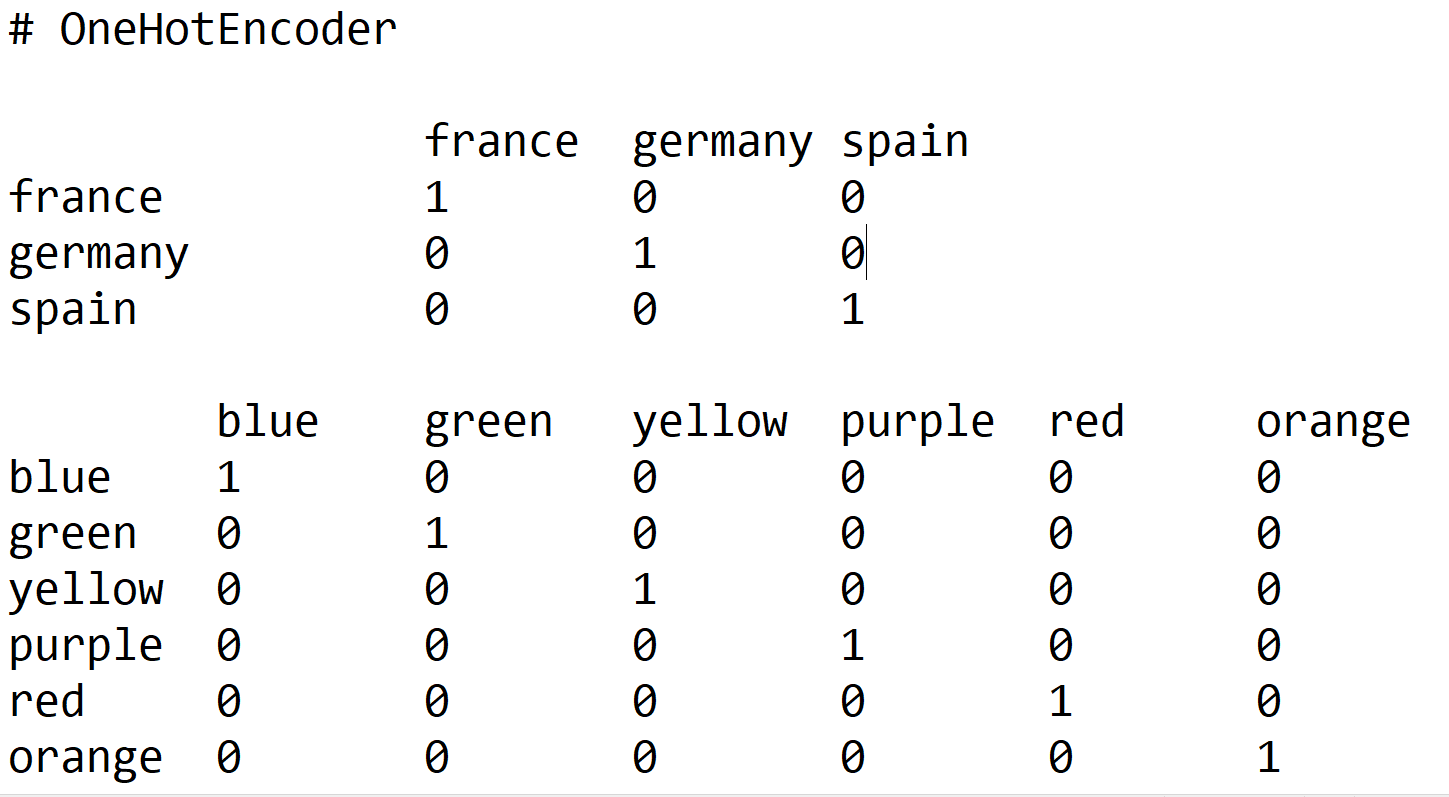

In [ ]:
from IPython.utils.sysinfo import encoding
# Categorical Data

from sklearn.compose import ColumnTransformer
# https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html?highlight=sklearn+compose+columntransformer#sklearn.compose.ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html?highlight=sklearn+preprocessing+onehotencoder#sklearn.preprocessing.OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html?highlight=sklearn+preprocessing+labelencoder#sklearn.preprocessing.LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [ ]:
# Train and Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=sklearn+train_test_split#sklearn.model_selection.train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train, X_test, y_train, y_test

(array([[0.0, 1.0, 0.0, 40.0, 63777.77777777778],
        [1.0, 0.0, 0.0, 37.0, 67000.0],
        [0.0, 0.0, 1.0, 27.0, 48000.0],
        [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
        [1.0, 0.0, 0.0, 48.0, 79000.0],
        [0.0, 0.0, 1.0, 38.0, 61000.0],
        [1.0, 0.0, 0.0, 44.0, 72000.0],
        [1.0, 0.0, 0.0, 35.0, 58000.0]], dtype=object),
 array([[0.0, 1.0, 0.0, 30.0, 54000.0],
        [0.0, 1.0, 0.0, 50.0, 83000.0]], dtype=object),
 array([1, 1, 1, 0, 1, 0, 0, 1]),
 array([0, 0]))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])

In [ ]:
X_train, X_test, y_train, y_test

(array([[0.0, 1.0, 0.0, 0.2630675731713538, 0.1238147854838185],
        [1.0, 0.0, 0.0, -0.25350147960148617, 0.4617563176278856],
        [0.0, 0.0, 1.0, -1.9753983221776195, -1.5309334063940294],
        [0.0, 0.0, 1.0, 0.05261351463427101, -1.1114197802841526],
        [1.0, 0.0, 0.0, 1.6405850472322605, 1.7202971959575162],
        [0.0, 0.0, 1.0, -0.08131179534387283, -0.16751412153692966],
        [1.0, 0.0, 0.0, 0.9518263102018072, 0.9861483502652316],
        [1.0, 0.0, 0.0, -0.5978808481167128, -0.48214934111933727]],
       dtype=object),
 array([[0.0, 1.0, 0.0, -1.4588292694047795, -0.9016629672292141],
        [0.0, 1.0, 0.0, 1.984964415747487, 2.139810822067393]],
       dtype=object),
 array([1, 1, 1, 0, 1, 0, 0, 1]),
 array([0, 0]))

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
col_df = pd.read_csv("Data2.csv")
col_df

,Country,color,Salary,Purchased
0,France,blue,72000.0,No
1,Spain,green,48000.0,Yes
2,Germany,yellow,54000.0,No
3,Spain,orange,61000.0,No
4,Germany,blue,NaN,Yes
5,France,yellow,58000.0,Yes
6,Spain,orange,52000.0,No
7,France,green,79000.0,Yes
8,Germany,yellow,83000.0,No
9,France,green,67000.0,Yes


In [ ]:
# Divide data into Independent and Dependent

X = col_df.iloc[:, 0:-1].values
y = col_df.iloc[:,-1].values
X, y

(array([['France', 'blue', 72000.0],
        ['Spain', 'green', 48000.0],
        ['Germany', 'yellow', 54000.0],
        ['Spain', 'orange', 61000.0],
        ['Germany', 'blue', nan],
        ['France', 'yellow', 58000.0],
        ['Spain', 'orange', 52000.0],
        ['France', 'green', 79000.0],
        ['Germany', 'yellow', 83000.0],
        ['France', 'green', 67000.0]], dtype=object),
 array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
       dtype=object))

In [ ]:
# Missing Data

from sklearn.impute import SimpleImputer
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:,2:3])
X[:,2:3]= imputer.transform(X[:,2:3])
X

array([['France', 'blue', 72000.0],
       ['Spain', 'green', 48000.0],
       ['Germany', 'yellow', 54000.0],
       ['Spain', 'orange', 61000.0],
       ['Germany', 'blue', 63777.77777777778],
       ['France', 'yellow', 58000.0],
       ['Spain', 'orange', 52000.0],
       ['France', 'green', 79000.0],
       ['Germany', 'yellow', 83000.0],
       ['France', 'green', 67000.0]], dtype=object)

In [ ]:
from IPython.utils.sysinfo import encoding
# Categorical Data

from sklearn.compose import ColumnTransformer
# https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html?highlight=sklearn+compose+columntransformer#sklearn.compose.ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html?highlight=sklearn+preprocessing+onehotencoder#sklearn.preprocessing.OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0, 1])], remainder='passthrough')

X = np.array(ct.fit_transform(X))
X

array([[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 72000.0],
       [0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 48000.0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 54000.0],
       [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 61000.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 58000.0],
       [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 52000.0],
       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 79000.0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 83000.0],
       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 67000.0]], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html?highlight=sklearn+preprocessing+labelencoder#sklearn.preprocessing.LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [ ]:
# Train and Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=sklearn+train_test_split#sklearn.model_selection.train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 7:] = sc.fit_transform(X_train[:, 7:])
X_test[:, 7:] = sc.transform(X_test[:, 7:])

In [ ]:
X_train, X_test, y_train, y_test

(array([[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.1238147854838185],
        [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.4617563176278856],
        [0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, -1.5309334063940294],
        [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, -1.1114197802841526],
        [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.7202971959575162],
        [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, -0.16751412153692966],
        [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.9861483502652316],
        [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, -0.48214934111933727]],
       dtype=object),
 array([[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, -0.9016629672292141],
        [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.139810822067393]],
       dtype=object),
 array([1, 1, 1, 0, 1, 0, 0, 1]),
 array([0, 0]))